# FTML Project Exercise 2

For this exercise, we will study the behavior of the Bayes Risk with absolute loss.

## Question 0

For this exercise, we will use the following function:

$$
f(x) = S * (x - 7)^3
$$

With S a natural random variable following this specific distribution: 

$$
\begin{array}{c|ccccc}
s & 1 & 2 & 3 & 4 & 5 \\ \hline
P(S = s) & 0.05 & 0.05 & 0.20 & 0.30 & 0.40
\end{array}
$$

The expectancy of S is 3.95

---
This function is derivable as follow:
$$
f'(x) = 3S * (x - 7)^2
$$

It therefore admits a 0 derivative for x0 = 7, without x = 7 being a local extremum. Let us plot this function:

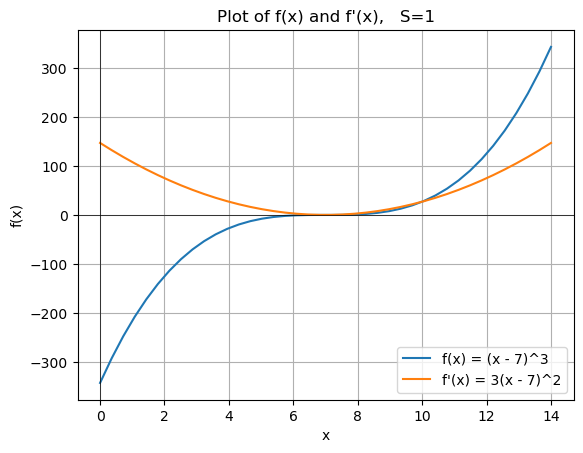

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return (x - 7)**3

def f_derivative(x) :
    return 3 * (x - 7)**2

# Create a range of x values
x = np.linspace(0, 14, 40)
y = f(x)
z = f_derivative(x)

# Plot the function
plt.plot(x, y, label='f(x) = (x - 7)^3')
plt.plot(x, z, label='f\'(x) = 3(x - 7)^2')
plt.title('Plot of f(x) and f\'(x),   S=1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.grid(True)
plt.legend()
plt.show()

## Question 1

Let us define an estimator h as follow:

$$
\LARGE
h(x) = 3 * (x - 7)^3
$$

Let us also define the Bayes predictor for the squared loss:

$$
\LARGE
f^*_{\ell_{\text{squared}}}(x) = 
\mathbb{E}[Y \mid X = x] = \bigl( x - 7 \bigr)^3 \cdot \mathbb{E}[S]
$$

Finally, we have:
$$
f^*_{\ell_{\text{squared}}}(x) = \bigl( x - 7 \bigr)^3 \cdot 3.95
$$

Let us compute their generalization error for both absolute and squared loss:

Settings: x = -3


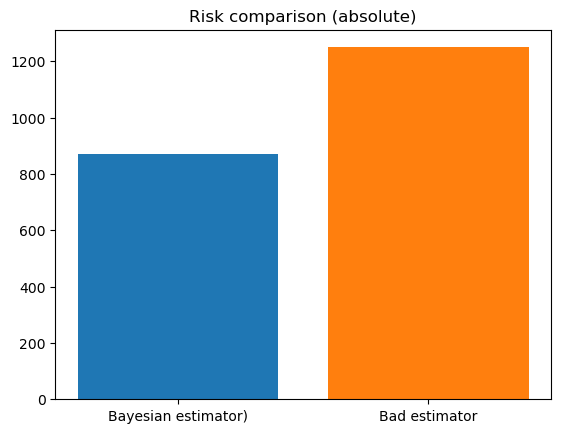

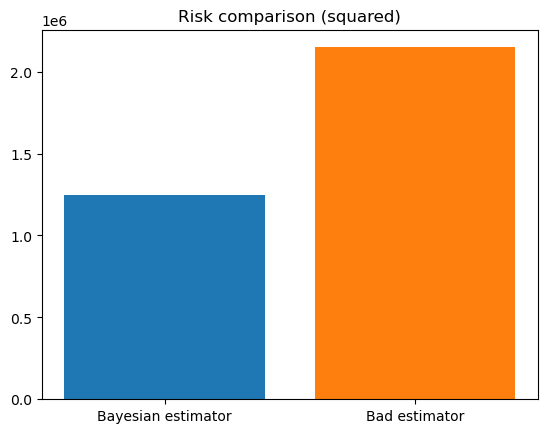

In [29]:
SAMPLE_SIZE = 1_000_000

# Bayes predictor for squared loss
bayes_pred = lambda x: 3.95 * (x - 7)**3

# bad estimator
h = lambda x: 3 * (x - 7)**3 

# Define S values
s_values = np.array([1, 2, 3, 4, 5])
s_probs = np.array([0.05, 0.05, 0.20, 0.30, 0.40])
s = np.random.choice(s_values, p=s_probs, size=SAMPLE_SIZE)

# Fix x
x = np.random.randint(low = -20, high = 20, size = 1)[0]

Y = s * (x - 7)**3

X_bayes = bayes_pred(x)
X_h = h(x)

# Absolute loss
R_absolute_bayes = np.mean(np.abs(Y - X_bayes))
R_absolute_h = np.mean(np.abs(Y - X_h))

# Squared loss
R_squared_bayes = np.mean((Y - X_bayes)**2)
R_squared_h = np.mean((Y - X_h)**2)

print(f"Settings: x = {x}")

assert R_absolute_bayes < R_absolute_h

plt.title("Risk comparison (absolute)")
plt.bar(x="Bayesian estimator)", height=R_absolute_bayes)
plt.bar(x="Bad estimator",      height=R_absolute_h)
plt.show()

plt.title("Risk comparison (squared)")
plt.bar(x="Bayesian estimator", height=R_squared_bayes)
plt.bar(x="Bad estimator",      height=R_squared_h)
plt.show()

pass

## Question 2